<h1 style="border: 2px solid aqua; border-radius: 8px; text-align: center; padding: 8px;">Mathematics for Machine Learning 2: TP 01 </h1>


In [15]:
import numpy as np

In [16]:
def qr_decomposition(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j].astype(float)
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v -= R[i, j] * Q[:, i]
        R[j, j] = np.sqrt(np.sum(v**2))
        Q[:, j] = v / R[j, j]

    return Q, R

In [17]:
# A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# A = np.array([[1, 0, 0], [0, 2, 0], [0, 0, 3]])
# A = np.array([[2, 1], [1, 2]])
# A = np.array([[4, 3], [2, 1]])
A = np.array(
    [
        [2, 0, 1, 2, 0],
        [2, -1, 0, 1, 1],
        [0, 1, 2, 1, 2],
        [-2, 0, 2, -1, 2],
        [2, 0, 0, 1, 1],
    ]
)

**1| Determinant**


In [18]:
def determinant(matrix):
    if matrix.shape[0] != matrix.shape[1]:
        raise ValueError("Matrix must be square to calculate the determinant.")

    if matrix.shape[0] == 2:
        return matrix[0, 0] * matrix[1, 1] - matrix[0, 1] * matrix[1, 0]
    else:
        result = 0
        for col in range(matrix.shape[1]):
            submatrix = np.delete(matrix, 0, axis=0)
            submatrix = np.delete(submatrix, col, axis=1)
            result += (-1) ** (col) * matrix[0, col] * determinant(submatrix)

        return result

Example:


In [19]:
print("numpy builtin function (np.linalg): ", np.linalg.det(A))
print("determinant(): ", determinant(A))

numpy builtin function (np.linalg):  6.000000000000003
determinant():  6


**2| Trace**


In [20]:
def trace(matrix):
    if matrix.shape[0] != matrix.shape[1]:
        raise ValueError("Matrix must be square to calculate the trace.")

    return np.sum(np.multiply(matrix, np.identity(matrix.shape[0])))

Example:


In [21]:
print("numpy builtin function (np.trace): ", np.trace(A))
print("trace(): ", trace(A))

numpy builtin function (np.trace):  3
trace():  3.0


**3| Eigenvalues**


In [22]:
def eigenvalues(A, iterations=100):
    m = A.shape[0]
    for _ in range(iterations):
        Q, R = qr_decomposition(A)
        A = np.dot(R, Q)

    eigenvalues = np.zeros(m)
    for i in range(m):
        eigenvalues[i] = A[i, i]

    return eigenvalues

Example:


In [23]:
print("Eigenvalues:")
print("NumPy's eig():", np.linalg.eig(A)[0])
print("Custom function:", eigenvalues(A))

Eigenvalues:
NumPy's eig(): [ 4.07509577+0.j          0.17549329+1.85061442j  0.17549329-1.85061442j
 -0.42608234+0.j         -1.        +0.j        ]
Custom function: [ 4.07509577  0.85371082 -0.50272425 -1.         -0.42608234]


**4| Eigenvectors**


In [24]:
def eigenvectors(A, max_iterations=100):
    m = A.shape[0]
    I = np.eye(m)
    for _ in range(max_iterations):
        Q, R = qr_decomposition(A)
        A = np.dot(R, Q)

    eigenvectors = np.zeros((m, m))
    for i in range(m):
        b = I[:, i]
        x = b.copy()
        for j in range(m - 1, -1, -1):
            x[j] = (b[j] - np.dot(A[j, j + 1 :], x[j + 1 :])) / A[j, j]

        eigenvectors[:, i] = x / np.sqrt(np.sum(x**2))

    return eigenvectors

Example:


In [25]:
print("Eigenvectors:\n", eigenvectors(A))

Eigenvectors:
 [[ 1.          0.13057243 -0.22016602 -0.21042543 -0.18462483]
 [ 0.          0.99143877 -0.78096318 -0.73475422 -0.7814993 ]
 [-0.         -0.         -0.58448562 -0.6283446  -0.58697967]
 [-0.         -0.         -0.         -0.14505323 -0.06747288]
 [-0.         -0.         -0.         -0.         -0.07794095]]


**4| Invertibility**


In [26]:
def invertibility(A):
    if A.shape[0] != A.shape[1]:
        return False

    return determinant(A) != 0

Example:


In [27]:
print("Invertibility:", invertibility(A))

Invertibility: True


**5 |Diagonalizability**


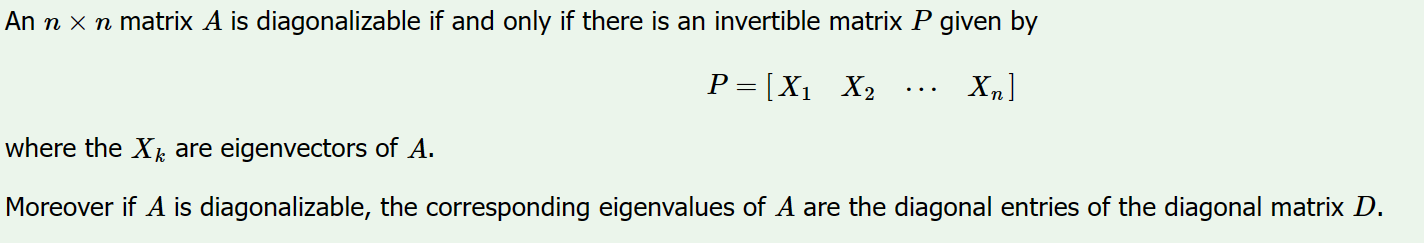

In [48]:
def diagonalizability(A):
    eigenvecs = eigenvectors(A)
    return invertibility(eigenvecs)

Example:

In [49]:
print("diagonalizability:", diagonalizability(A))

diagonalizability: True
